Coefficients: 
 [257.02656478]
Intercept: 
 152.08314613758742
Mean squared error: 4967.31
Variance score: 0.18
Mean absolute error: 61.52
R2 score Ridge: 0.18
Vif= 1.219342329304719


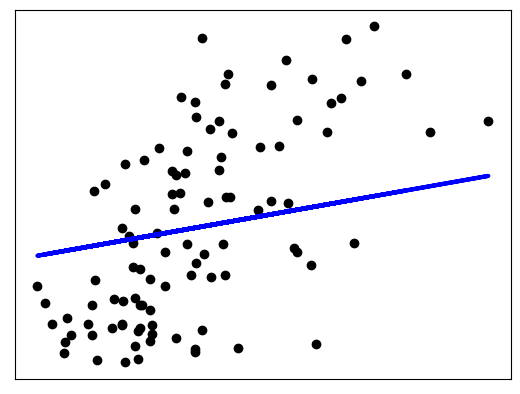

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn import preprocessing

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

#diabetes.feature_names
#['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
#diabes.DESCR
#bp= blood presure, and 6 blood serum movements
#predict disease progressing one year after base line

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

#number of samples
nSamples=diabetes.data.shape[0]

# number of testing data
nTest=100

# Use only one feature
featureNumber=2
diabetes_X = diabetes.data[:, featureNumber].reshape(-1,1)

#diabetes_X, diabetes.target = unison_shuffled_copies(diabetes_X, diabetes.target)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-nTest]
diabetes_X_test = diabetes_X[-nTest:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-nTest]
diabetes_y_test = diabetes.target[-nTest:]

# Create linear regression object
#regr = linear_model.LinearRegression()
#Go for ridge regression
regr = Ridge(alpha=2)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print ('Coefficients: \n', regr.coef_)
print ('Intercept: \n',regr.intercept_)
# The mean squared error
print ("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
r2=r2_score(diabetes_y_test, diabetes_y_pred)
print ("Mean absolute error: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
print ('R2 score Ridge: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


vif=1/(1-r2)
print ('Vif=',vif)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


